**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля
-4 балла после 06:00 10 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

##### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -0.5 баллов
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -0.5 баллов


In [102]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [105]:
#%%pycodestyle

from scipy.spatial.distance import cdist
from sklearn.preprocessing import normalize
from scipy.stats import mode

from scipy.spatial import KDTree

class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin, ClassifierMixin):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        self.neighbors = n_neighbors
        self.algorithm = algorithm
    
    def fit(self, X, y):
        if self.algorithm == 'kd_tree':
            self.data = KDTree(X)
        else:
            self.data = np.array(X)
        
        self.labels = np.array(y)
    
    def predict(self, X):
        if self.algorithm == 'kd_tree':
            neighbors_indexes = self.data.query(X, k=self.neighbors)[1]
            
        else:
            # calculate distances
            distances = cdist(X, self.data)
            
            # make a list of k neighbors targets
            neighbors_indexes = np.argpartition(distances, self.neighbors, axis=1)
            
        k_nearest = self.labels[neighbors_indexes[:, :self.neighbors]]

        # return most common values
        # numpy changes dtype of k_nearest to "np.ndarray" so workaround .astype(type(self.labels[0])
        return mode(k_nearest.astype(type(self.labels[0])), axis=1)[0].T
    
    def predict_proba(self, X):
        if self.algorithm == 'kd_tree':
            neighbors_indexes = self.data.query(X, k=self.neighbors)[1]
            
        else:
            # calculate distances
            distances = cdist(X, self.data)
            
            # make a list of k neighbors targets
            neighbors_indexes = np.argpartition(distances, self.neighbors, axis=1)
        
        k_nearest = self.labels[neighbors_indexes[:, :self.neighbors]]
        
        all_classes = np.unique(self.labels)
        
        classes_for_each_entry = np.empty((X.shape[0], all_classes.shape[0]), dtype = all_classes.dtype)
        classes_for_each_entry[:] =  all_classes      
        
        classes_for_each_entry = np.concatenate([k_nearest, classes_for_each_entry], axis=1)
        classes_for_each_entry = classes_for_each_entry.astype(int, casting="unsafe")
        counts_for_each_entry = np.apply_along_axis(np.bincount, 1, classes_for_each_entry)
            
        # normalize before returning
        return (counts_for_each_entry - 1) / self.neighbors
    
    def score(self, X, y):
        return (self.predict(X) == y).sum() / y.size

**IRIS**

In [106]:
iris = datasets.load_iris()

In [107]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [108]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [109]:
%time clf.fit(X_train, y_train)

CPU times: user 664 µs, sys: 279 µs, total: 943 µs
Wall time: 687 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [110]:
%time my_clf.fit(X_train, y_train)

CPU times: user 33 µs, sys: 33 µs, total: 66 µs
Wall time: 53.2 µs


In [111]:
%time clf.predict(X_test)

CPU times: user 2.84 ms, sys: 1.75 ms, total: 4.59 ms
Wall time: 3.16 ms


array([1, 0, 1, 0, 0, 2, 1, 2, 2, 1, 0, 0, 1, 1, 2])

In [112]:
%time my_clf.predict(X_test)

CPU times: user 2.66 ms, sys: 1.96 ms, total: 4.62 ms
Wall time: 3.02 ms


array([[1, 0, 1, 0, 0, 2, 1, 2, 2, 1, 0, 0, 1, 1, 2]])

In [113]:
%time clf.predict_proba(X_test)

CPU times: user 1.44 ms, sys: 580 µs, total: 2.02 ms
Wall time: 1.53 ms


array([[0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.5, 0.5],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ]])

In [114]:
%time my_clf.predict_proba(X_test)

CPU times: user 859 µs, sys: 409 µs, total: 1.27 ms
Wall time: 950 µs


array([[0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.5, 0.5],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ]])

In [115]:
clf.score(X_test, y_test)

0.9333333333333333

In [116]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

highest score is at 17 neighbors


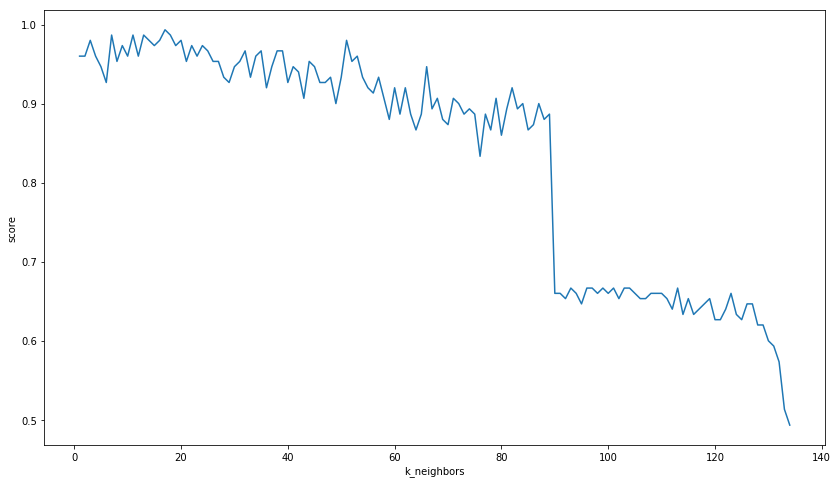

In [117]:
fig = plt.figure(figsize= (14,8))
ax = plt.subplot(111)

ax.set_xlabel('k_neighbors')
ax.set_ylabel('score')

neighbors = np.arange(1,X_train.shape[0])
scores = []
for neighbor in neighbors:
    my_clf = MyKNeighborsClassifier(n_neighbors=neighbor, algorithm='brute')
    cur_scores = np.empty(10)
    
    # calculate mean score
    fold = 10
    for i in range(0, fold):
        # handmade k-fold cross validation
        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)
        my_clf.fit(X_train, y_train)
        
        cur_scores[i] = my_clf.score(X_test, y_test)
    
    scores.append(cur_scores.mean())

plt.plot(neighbors, scores)

optimal_n = neighbors[scores.index(max(scores))]
print("highest score is at %d neighbors" % optimal_n)

**MNIST**

In [118]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [119]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [120]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [121]:
%time clf.fit(X_train, y_train)

CPU times: user 162 ms, sys: 2.33 ms, total: 164 ms
Wall time: 162 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [122]:
%time my_clf.fit(X_train, y_train)

CPU times: user 146 ms, sys: 134 ms, total: 280 ms
Wall time: 280 ms


In [124]:
%time clf.predict(X_test)

CPU times: user 4.05 s, sys: 404 ms, total: 4.46 s
Wall time: 2.79 s


array(['6', '1', '1', '9', '7', '8', '6', '2', '6', '4', '9', '1', '6',
       '2', '5', '8', '8', '3', '0', '7', '9', '0', '5', '9', '0', '1',
       '5', '7', '5', '3', '6', '2', '2', '8', '6', '8', '2', '1', '7',
       '8', '9', '6', '7', '5', '8', '6', '6', '2', '2', '9', '0', '4',
       '0', '9', '6', '4', '6', '9', '6', '7', '5', '5', '0', '0', '6',
       '5', '8', '8', '3', '7', '4', '8', '8', '8', '4', '4', '6', '7',
       '5', '4', '1', '5', '5', '8', '0', '9', '5', '4', '5', '0', '5',
       '3', '1', '7', '1', '7', '9', '8', '2', '9', '9', '5', '7', '1',
       '2', '9', '7', '3', '7', '2', '5', '3', '4', '0', '4', '9', '3',
       '3', '7', '4', '1', '4', '7', '1', '6', '3', '3', '5', '4', '1',
       '3', '4', '9', '4', '4', '8', '3', '7', '5', '2', '3', '7', '0',
       '3', '9', '0', '2', '2', '1', '4', '8', '5', '6', '7', '1', '3',
       '1', '1', '2', '4', '8', '2', '5', '2', '5', '8', '9', '4', '5',
       '8', '2', '4', '2', '3', '6', '3', '8', '2', '3', '6', '3

In [123]:
%time my_clf.predict(X_test)

CPU times: user 40.5 s, sys: 1.2 s, total: 41.7 s
Wall time: 42.5 s


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


array([['6', '1', '1', '9', '7', '8', '6', '2', '6', '4', '9', '1', '6',
        '2', '5', '8', '8', '3', '0', '7', '9', '0', '5', '9', '0', '1',
        '5', '7', '5', '3', '6', '2', '2', '8', '6', '8', '2', '1', '7',
        '8', '9', '6', '7', '5', '8', '6', '6', '2', '2', '9', '0', '4',
        '0', '9', '6', '4', '6', '9', '6', '7', '5', '5', '0', '0', '6',
        '5', '8', '8', '3', '7', '4', '8', '8', '8', '4', '4', '6', '7',
        '5', '4', '1', '5', '5', '8', '0', '9', '5', '4', '5', '0', '5',
        '3', '1', '7', '1', '7', '9', '8', '2', '9', '9', '5', '7', '1',
        '2', '9', '7', '3', '7', '2', '5', '3', '4', '0', '4', '9', '3',
        '3', '7', '4', '1', '4', '7', '1', '6', '3', '3', '5', '4', '1',
        '3', '4', '9', '4', '4', '8', '3', '7', '5', '2', '3', '7', '0',
        '3', '9', '0', '2', '2', '1', '4', '8', '5', '6', '7', '1', '3',
        '1', '1', '2', '4', '8', '2', '5', '2', '5', '8', '9', '4', '5',
        '8', '2', '4', '2', '3', '6', '3', '8', '2'

In [125]:
%time clf.predict_proba(X_test)

CPU times: user 3.28 s, sys: 287 ms, total: 3.56 s
Wall time: 2.14 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [126]:
%time my_clf.predict_proba(X_test)

CPU times: user 38.5 s, sys: 1.07 s, total: 39.6 s
Wall time: 40.4 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [127]:
clf.score(X_test, y_test)

0.9642857142857143

In [128]:
my_clf.score(X_test, y_test)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


0.9642857142857143

Задание 4

In [129]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [130]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [131]:
%time clf.fit(X_train, y_train)

CPU times: user 33.1 s, sys: 207 ms, total: 33.3 s
Wall time: 33.4 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [132]:
%time my_clf.fit(X_train, y_train)

CPU times: user 20.9 s, sys: 24 s, total: 44.9 s
Wall time: 48.1 s


In [133]:
%time clf.predict(X_test)

CPU times: user 54.8 s, sys: 192 ms, total: 55 s
Wall time: 55.2 s


array(['1', '4', '1', '2', '2', '0', '8', '5', '9', '7', '1', '5', '3',
       '6', '7', '7', '1', '3', '3', '3', '5', '5', '8', '9', '2', '7',
       '9', '4', '7', '8', '9', '9', '7', '9', '5', '6', '8', '1', '7',
       '1', '9', '6', '1', '4', '1', '9', '8', '2', '5', '3', '7', '9',
       '0', '0', '2', '1', '9', '9', '1', '0', '0', '7', '7', '9', '5',
       '8', '5', '2', '8', '3', '8', '7', '0', '4', '3', '1', '8', '9',
       '5', '1', '1', '5', '9', '9', '8', '2', '8', '3', '2', '5', '2',
       '7', '6', '2', '0', '6', '6', '8', '2', '3', '1', '1', '8', '4',
       '8', '9', '4', '9', '1', '4', '3', '6', '7', '0', '6', '0', '5',
       '8', '5', '7', '9', '7', '3', '2', '3', '8', '4', '2', '7', '2',
       '1', '1', '9', '5', '9', '4', '9', '1', '0', '5', '1', '6', '9',
       '6', '0', '5', '5', '3', '9', '5', '1', '3', '9', '8', '4', '3',
       '7', '2', '4', '4', '3', '2', '2', '8', '1', '9', '7', '8', '1',
       '6', '9', '7', '8', '7', '3', '3', '8', '5', '2', '6', '6

In [134]:
%time my_clf.predict(X_test)

CPU times: user 21min 17s, sys: 2.07 s, total: 21min 19s
Wall time: 21min 20s


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


array([['1', '4', '1', '2', '2', '0', '8', '5', '9', '7', '1', '5', '3',
        '6', '7', '7', '1', '3', '3', '3', '5', '5', '8', '9', '2', '7',
        '9', '4', '7', '8', '9', '9', '7', '9', '5', '6', '8', '1', '7',
        '1', '9', '6', '1', '4', '1', '9', '8', '2', '5', '3', '7', '9',
        '0', '0', '2', '1', '9', '9', '1', '0', '0', '7', '7', '9', '5',
        '8', '5', '2', '8', '3', '8', '7', '0', '4', '3', '1', '8', '9',
        '5', '1', '1', '5', '9', '9', '8', '2', '8', '3', '2', '5', '2',
        '7', '6', '2', '0', '6', '6', '8', '2', '3', '1', '1', '8', '4',
        '8', '9', '4', '9', '1', '4', '3', '6', '7', '0', '6', '0', '5',
        '8', '5', '7', '9', '7', '3', '2', '3', '8', '4', '2', '7', '2',
        '1', '1', '9', '5', '9', '4', '9', '1', '0', '5', '1', '6', '9',
        '6', '0', '5', '5', '3', '9', '5', '1', '3', '9', '8', '4', '3',
        '7', '2', '4', '4', '3', '2', '2', '8', '1', '9', '7', '8', '1',
        '6', '9', '7', '8', '7', '3', '3', '8', '5'

In [135]:
%time clf.predict_proba(X_test)

CPU times: user 54.8 s, sys: 141 ms, total: 54.9 s
Wall time: 55.1 s


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [136]:
%time my_clf.predict_proba(X_test)

CPU times: user 21min 36s, sys: 3.3 s, total: 21min 40s
Wall time: 21min 44s


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [137]:
clf.score(X_test, y_test)

0.9757142857142858

In [142]:
my_clf.score(X_test, y_test)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


0.9757142857142858

In [ ]:
Задание 5

In [ ]:
# seaborn
# outofthebox решение для визуализации данных (основано на matplotlib)

# matplotlib
# библиотека для визуализации данных и построения графиков

# train_test_split
# разбивает входные данные на train и test подмножества

# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
# нужна для задач, где необходимо последовательно обработать данные различными алгоритмами,
# задавая им разные параматры и проверить результаты на кросс валидации

# StandardScaler (from sklearn.preprocessing import StandardScaler)
# нужен для того чтобы нормировать фичи перед тем как использовать на них алгоритмы
# у обработанных данных mean = 0 и standard deviation = 1

# ClassifierMixin
# mixin класс для скоринговых классов

# NeighborsBase
# mixin для классов типа k ближайщих соседей

# KNeighborsMixin
# mixin с brute алгоритмом knn

# SupervisedIntegerMixin
# mixin проверяет параметры fit и вызывает ee (fit)